In [1]:
import os, sys

import numpy as np
from scipy.stats import chi2_contingency
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id="import-and-clean-data"></a>
# 1.  Import and Clean data

In [2]:
df = pd.read_csv('C:/Users/ASUS/Documents/project/Telco-Customer-Churn.csv')
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [3]:
df.drop(labels=['customerID'], axis=1, inplace=True)
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


<a id="data-munging"></a>
## 1.2.  Data Munging

<a id="checking-for-null-values-in-the-dataset"></a>
### 1.2.1.  Checking for null values in the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [5]:
## Shorten the Labels
value_mapper = {'Female': 'F', 'Male': 'M', 'Yes': 'Y', 'No': 'N',
                'No phone service': 'No phone', 'Fiber optic': 'Fiber',
                'No internet service': 'No internet', 'Month-to-month': 'Monthly',
                'Bank transfer (automatic)': 'Bank transfer',
                'Credit card (automatic)': 'Credit card',
                'One year': '1 yr', 'Two year': '2 yr'}
df.replace(to_replace=value_mapper, inplace=True)
# Another method
# df = df.applymap(lambda v: value_mapper[v] if v in value_mapper.keys() else v)

In [6]:
df.columns = [label.lower() for label in df.columns]
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
gender,F,M,M,M,F,F,M,F,F,M
seniorcitizen,0,0,0,0,0,0,0,0,0,0
partner,Y,N,N,N,N,N,N,N,Y,N
dependents,N,N,N,N,N,N,Y,N,N,Y
tenure,1,34,2,45,2,8,22,10,28,62
phoneservice,N,Y,Y,N,Y,Y,Y,N,Y,Y
multiplelines,No phone,N,N,No phone,N,Y,Y,No phone,Y,N
internetservice,DSL,DSL,DSL,DSL,Fiber,Fiber,Fiber,DSL,Fiber,DSL
onlinesecurity,N,Y,Y,Y,N,N,N,Y,N,Y
onlinebackup,Y,N,Y,N,N,N,Y,N,N,Y


<a id="column-type-casting-and-imputation"></a>
### 1.2.3.  Column Type Casting and Imputation
Pandas couldn't properly cast the data type of several columns. For instance, the `TotalCharges` column is recognized as `object` instead of `float`. Similarly, all the categorical columns were casted as `object` type instead of `pd.Categorical`.

In [7]:
df['totalcharges'] = pd.to_numeric(df['totalcharges'], errors='coerce')
df['totalcharges'].head()

0      29.85
1    1889.50
2     108.15
3    1840.75
4     151.65
Name: totalcharges, dtype: float64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   seniorcitizen     7043 non-null   int64  
 2   partner           7043 non-null   object 
 3   dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   phoneservice      7043 non-null   object 
 6   multiplelines     7043 non-null   object 
 7   internetservice   7043 non-null   object 
 8   onlinesecurity    7043 non-null   object 
 9   onlinebackup      7043 non-null   object 
 10  deviceprotection  7043 non-null   object 
 11  techsupport       7043 non-null   object 
 12  streamingtv       7043 non-null   object 
 13  streamingmovies   7043 non-null   object 
 14  contract          7043 non-null   object 
 15  paperlessbilling  7043 non-null   object 
 16  paymentmethod     7043 non-null   object 


In [9]:
df[np.isnan(df['totalcharges'])]

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
488,F,0,Y,Y,0,N,No phone,DSL,Y,N,Y,Y,Y,N,2 yr,Y,Bank transfer,52.55,NaN,N
753,M,0,N,Y,0,Y,N,N,No internet,No internet,No internet,No internet,No internet,No internet,2 yr,N,Mailed check,20.25,NaN,N
936,F,0,Y,Y,0,Y,N,DSL,Y,Y,Y,N,Y,Y,2 yr,N,Mailed check,80.85,NaN,N
1082,M,0,Y,Y,0,Y,Y,N,No internet,No internet,No internet,No internet,No internet,No internet,2 yr,N,Mailed check,25.75,NaN,N
1340,F,0,Y,Y,0,N,No phone,DSL,Y,Y,Y,Y,Y,N,2 yr,N,Credit card,56.05,NaN,N
3331,M,0,Y,Y,0,Y,N,N,No internet,No internet,No internet,No internet,No internet,No internet,2 yr,N,Mailed check,19.85,NaN,N
3826,M,0,Y,Y,0,Y,Y,N,No internet,No internet,No internet,No internet,No internet,No internet,2 yr,N,Mailed check,25.35,NaN,N
4380,F,0,Y,Y,0,Y,N,N,No internet,No internet,No internet,No internet,No internet,No internet,2 yr,N,Mailed check,20.00,NaN,N
5218,M,0,Y,Y,0,Y,N,N,No internet,No internet,No internet,No internet,No internet,No internet,1 yr,Y,Mailed check,19.70,NaN,N
6670,F,0,Y,Y,0,Y,Y,DSL,N,Y,Y,Y,Y,N,2 yr,N,Mailed check,73.35,NaN,N


In [10]:
df[df['tenure'] == 0].index

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [11]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df[df['tenure'] == 0].index

Int64Index([], dtype='int64')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   seniorcitizen     7032 non-null   int64  
 2   partner           7032 non-null   object 
 3   dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   phoneservice      7032 non-null   object 
 6   multiplelines     7032 non-null   object 
 7   internetservice   7032 non-null   object 
 8   onlinesecurity    7032 non-null   object 
 9   onlinebackup      7032 non-null   object 
 10  deviceprotection  7032 non-null   object 
 11  techsupport       7032 non-null   object 
 12  streamingtv       7032 non-null   object 
 13  streamingmovies   7032 non-null   object 
 14  contract          7032 non-null   object 
 15  paperlessbilling  7032 non-null   object 
 16  paymentmethod     7032 non-null   object 


In [13]:
def summarize_categoricals(df, show_levels=False):
    """
        Display uniqueness in each column
    """
    data = [[df[c].unique(), len(df[c].unique()), df[c].isnull().sum()] for c in df.columns]
    df_temp = pd.DataFrame(data, index=df.columns,
                           columns=['Levels', 'No. of Levels', 'No. of Missing Values'])
    return df_temp.iloc[:, 0 if show_levels else 1:]


def find_categorical(df, cutoff=10):
    """
        Function to find categorical columns in the dataframe.
    """
    cat_cols = []
    for col in df.columns:
        if len(df[col].unique()) <= cutoff:
            cat_cols.append(col)
    return cat_cols


def to_categorical(columns, df):
    """
        Converts the columns passed in `columns` to categorical datatype
    """
    for col in columns:
        df[col] = df[col].astype('category')
    return df

In [14]:
summarize_categoricals(df, show_levels=True)

,Levels,No. of Levels,No. of Missing Values
gender,"[F, M]",2,0
seniorcitizen,"[0, 1]",2,0
partner,"[Y, N]",2,0
dependents,"[N, Y]",2,0
tenure,"[1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ...",72,0
phoneservice,"[N, Y]",2,0
multiplelines,"[No phone, N, Y]",3,0
internetservice,"[DSL, Fiber, N]",3,0
onlinesecurity,"[N, Y, No internet]",3,0
onlinebackup,"[Y, N, No internet]",3,0


In [15]:
df = to_categorical(find_categorical(df), df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7032 non-null   category
 1   seniorcitizen     7032 non-null   category
 2   partner           7032 non-null   category
 3   dependents        7032 non-null   category
 4   tenure            7032 non-null   int64   
 5   phoneservice      7032 non-null   category
 6   multiplelines     7032 non-null   category
 7   internetservice   7032 non-null   category
 8   onlinesecurity    7032 non-null   category
 9   onlinebackup      7032 non-null   category
 10  deviceprotection  7032 non-null   category
 11  techsupport       7032 non-null   category
 12  streamingtv       7032 non-null   category
 13  streamingmovies   7032 non-null   category
 14  contract          7032 non-null   category
 15  paperlessbilling  7032 non-null   category
 16  paymentmethod     7032 n

In [16]:
new_order = list(df.columns)
new_order.insert(16, new_order.pop(4))
df = df[new_order]
df.head(2)

,gender,seniorcitizen,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,tenure,monthlycharges,totalcharges,churn
0,F,0,Y,N,N,No phone,DSL,N,Y,N,N,N,N,Monthly,Y,Electronic check,1,29.85,29.85,N
1,M,0,N,N,Y,N,DSL,Y,N,Y,N,N,N,1 yr,N,Mailed check,34,56.95,1889.50,N


<a id="correlations-in-the-data"></a>
# 2.  Correlations in the data

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
monthlycharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
totalcharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


<a id="correlation-between-quantitative-variables"></a>
## 2.1.  Correlation between Quantitative variables

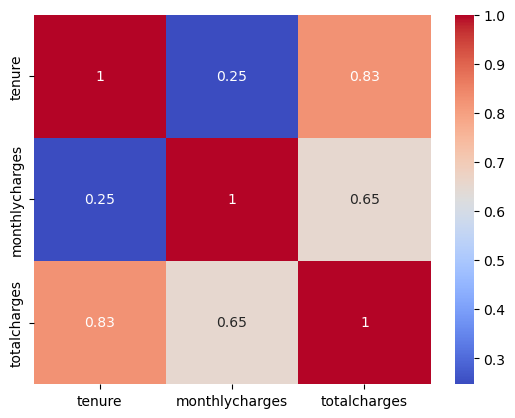

In [18]:
sns.heatmap(data=df[['tenure', 'monthlycharges', 'totalcharges']].corr(),
            annot=True, cmap='coolwarm');

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


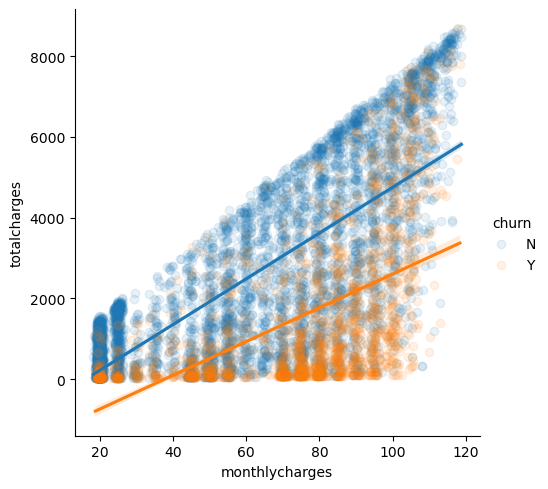

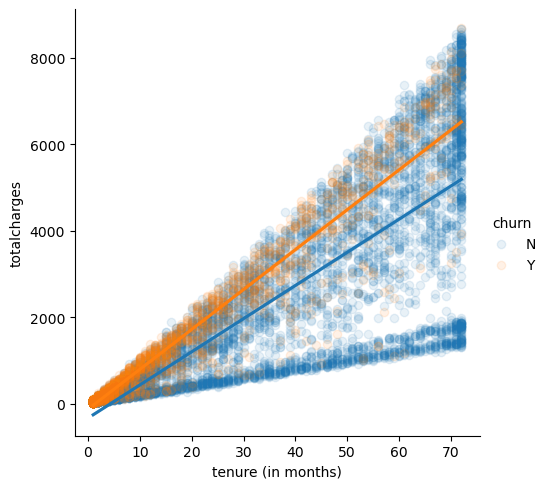

In [19]:
sns.lmplot('monthlycharges', 'totalcharges', data=df, hue='churn',
           scatter_kws={'alpha': 0.1})
fig = sns.lmplot('tenure', 'totalcharges', data=df, hue='churn',
                 scatter_kws={'alpha': 0.1})
fig.set_xlabels('tenure (in months)');

<a id="correlation-between-qualitative/-categorical-variables"></a>
## 2.2.  Correlation between Qualitative/ Categorical variables
`Cramer's V` is more appropriate than Pearson correlation to find correlation between two nominal variables. Here, the `Cramer's V` metric is implemented.

In [20]:
def cramers_corrected_stat(contingency_table):
    """
        Computes corrected Cramer's V statistic for categorial-categorial association
    """
    chi2 = chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    phi2 = chi2/n
    
    r, k = contingency_table.shape
    r_corrected = r - (((r-1)**2)/(n-1))
    k_corrected = k - (((k-1)**2)/(n-1))
    phi2_corrected = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    
    return (phi2_corrected / min( (k_corrected-1), (r_corrected-1)))**0.5

In [21]:
def categorical_corr_matrix(df):
    """
        Computes corrected Cramer's V statistic between
        all the categorical variables in the dataframe
    """
    df = df.select_dtypes(include='category')
    cols = df.columns
    n = len(cols)
    corr_matrix = pd.DataFrame(np.zeros(shape=(n, n)), index=cols, columns=cols)
    
    for col1 in cols:
        for col2 in cols:
            if col1 == col2:
                corr_matrix.loc[col1, col2] = 1
                break
            df_crosstab = pd.crosstab(df[col1], df[col2], dropna=False)
            corr_matrix.loc[col1, col2] = cramers_corrected_stat(df_crosstab)
    
    # Flip and add to get full correlation matrix
    corr_matrix += np.tril(corr_matrix, k=-1).T
    return corr_matrix

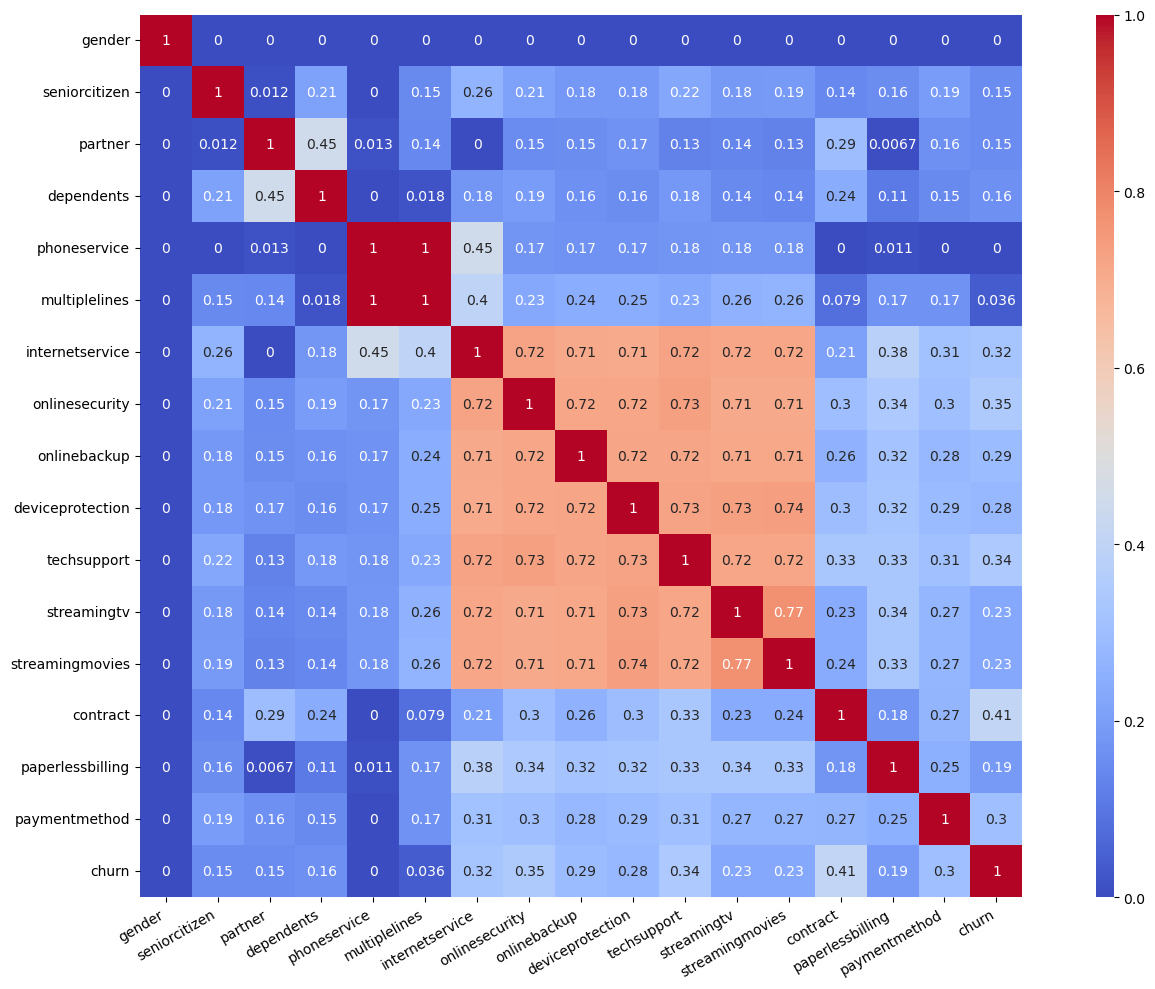

In [22]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(categorical_corr_matrix(df), annot=True, cmap='coolwarm', 
            cbar_kws={'aspect': 50}, square=True, ax=ax)
plt.xticks(rotation=30, ha='right');
plt.tight_layout()

<a id="data-visualization"></a>
# 3.  Data Visualization

<a id="frequency-distribution%3A-categorical-variables"></a>
## 3.1.  Frequency distribution: categorical variables

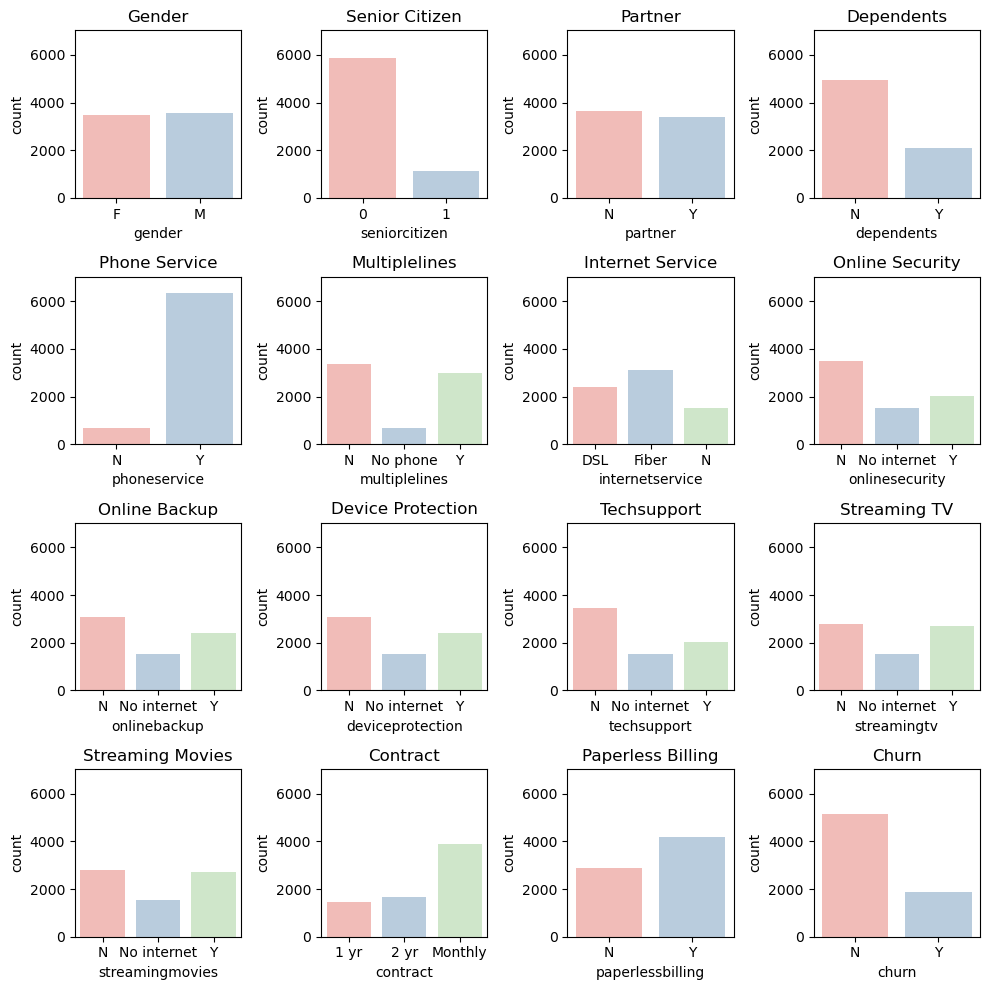

In [25]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))
titles = ['Gender', 'Senior Citizen', 'Partner', 'Dependents',
          'Phone Service', 'Multiplelines', 'Internet Service', 'Online Security',
          'Online Backup', 'Device Protection', 'Techsupport', 'Streaming TV',
          'Streaming Movies', 'Contract', 'Paperless Billing', 'Churn']

ax_title_pairs = zip(axs.flat, titles)

for ax, title in ax_title_pairs:
    sns.countplot(x=''.join(title.lower().split()), data=df, palette='Pastel1', ax=ax)
    ax.set_title(title)
    ax.set_ylim(0, 7032)

plt.tight_layout()

<a id="frequency-distribution%3A-monthlycharges-and-tenure"></a>
## 3.2.  Frequency distribution: monthlycharges and tenure

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

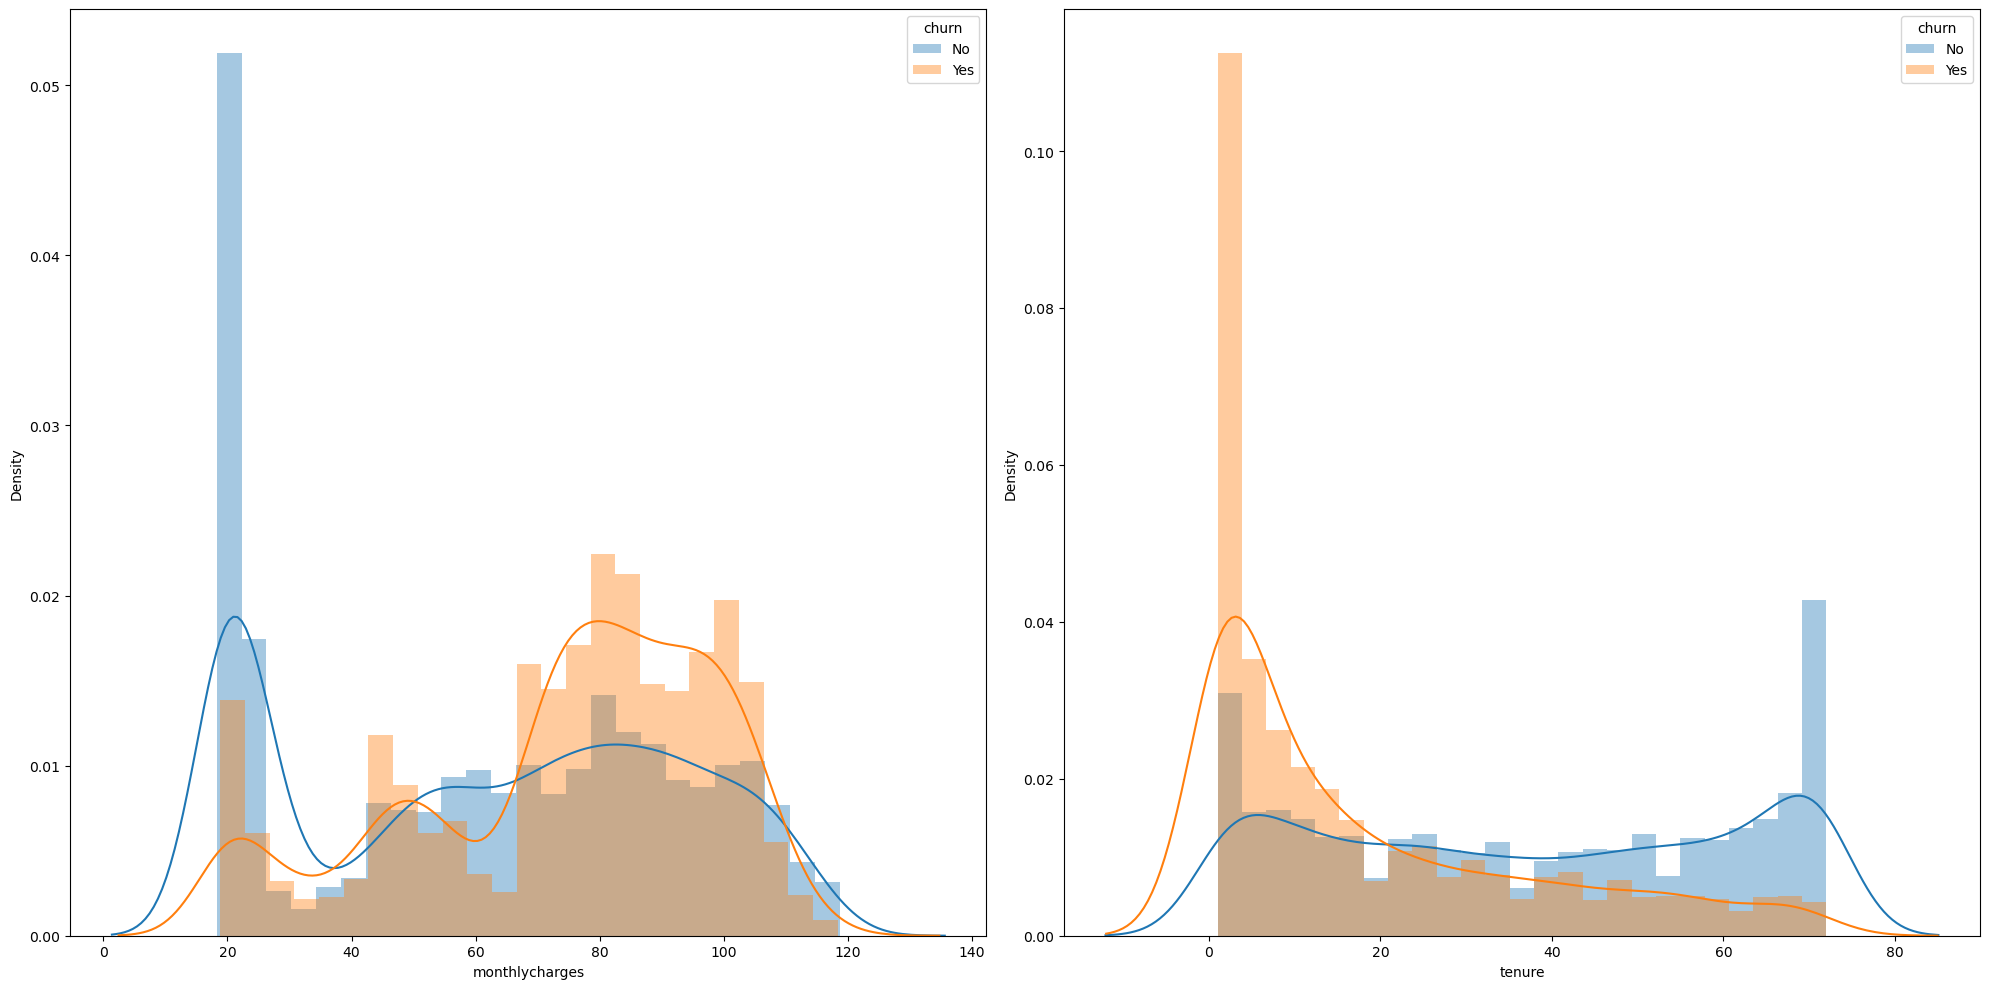

In [30]:
df_grouped = df.groupby(by='churn')
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
cols = ['monthlycharges', 'tenure']
for i in range(len(cols)):
    sns.distplot(df_grouped.get_group('N')[cols[i]], bins=25, ax=axes[i], label='No')
    sns.distplot(df_grouped.get_group('Y')[cols[i]], bins=25, ax=axes[i], label='Yes')
    axes[i].legend(title='churn')

fig.tight_layout()

<a id="box-plots"></a>
## 3.3.  Box Plots

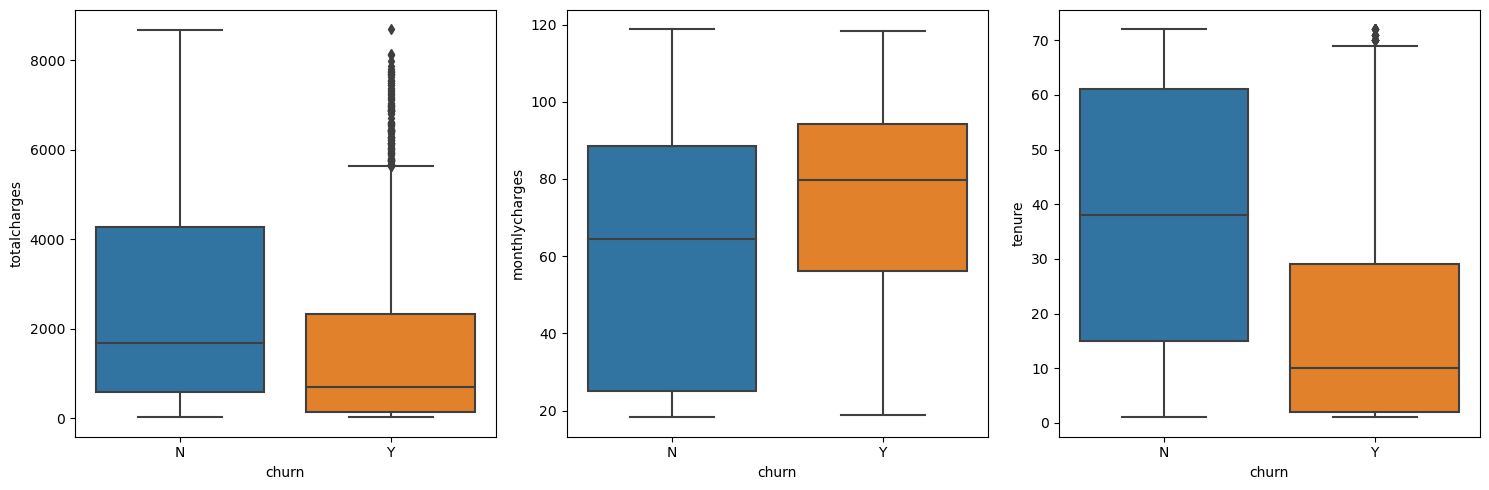

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
cols = ['totalcharges', 'monthlycharges', 'tenure']
for i in range(len(cols)):
    sns.boxplot(x='churn', y=cols[i], data=df, ax=axes[i])
fig.tight_layout()

<a id="contribution-to-churned-revenue"></a>
## 3.4.  Contribution to churned revenue
Following graph represents percent contributed by customers in each tenure bin to the lost/ churned revenue.

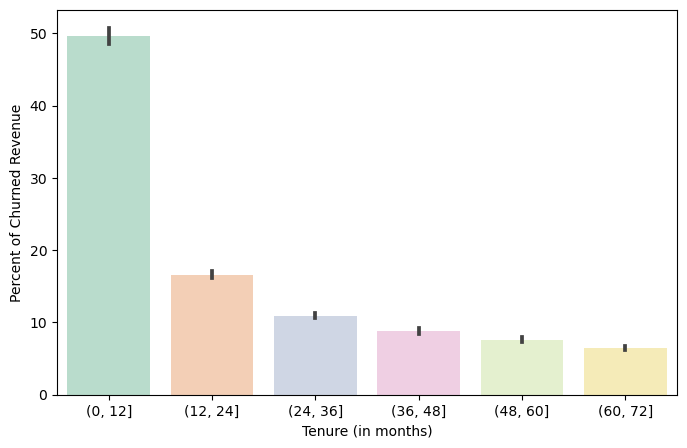

In [26]:
churned_users = df_grouped.get_group('Y')
bins = [(0, 12), (12, 24), (24, 36), (36, 48), (48, 60), (60, 72)]
binned_tenure = pd.cut(list(churned_users['tenure']),
                       bins=pd.IntervalIndex.from_tuples(bins))
revenue_share = churned_users['monthlycharges'] / churned_users['monthlycharges'].sum()
temp_df = pd.DataFrame(data={'tenure':binned_tenure, 
                             'revenue_share(%)': revenue_share * 100})


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5))
sns.barplot(x='tenure', y='revenue_share(%)', data=temp_df,
            estimator=np.sum, palette='Pastel2', ax=ax)
ax.set_xlabel('Tenure (in months)')
ax.set_ylabel('Percent of Churned Revenue');

<a id="churn-among-different-contract-types"></a>
## 3.5.  Churn among different contract types

contract,1 yr,2 yr,Monthly
churn,,,
N,1306,1637,2220
Y,166,48,1655


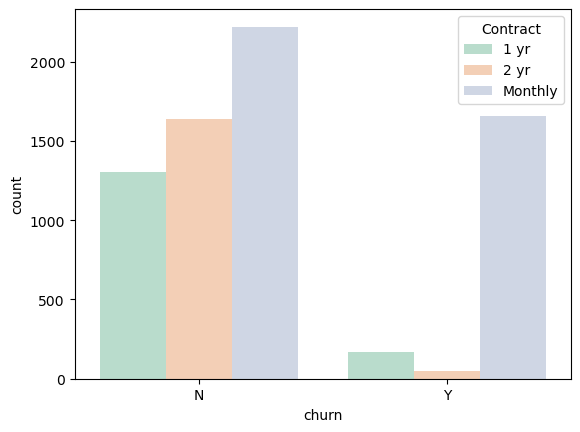

In [27]:
display(pd.crosstab(df['churn'], df['contract'], dropna=False))
sns.countplot(x='churn', hue='contract', data=df, palette='Pastel2')

# Put the legend out of the figure
plt.legend(title='Contract', bbox_to_anchor=(1, 1));

<a id="churn-among-various-categories-and-their-contribution-to-%28monthly%29-revenue"></a>
## 3.6.  Churn among various categories and their contribution to (monthly) revenue

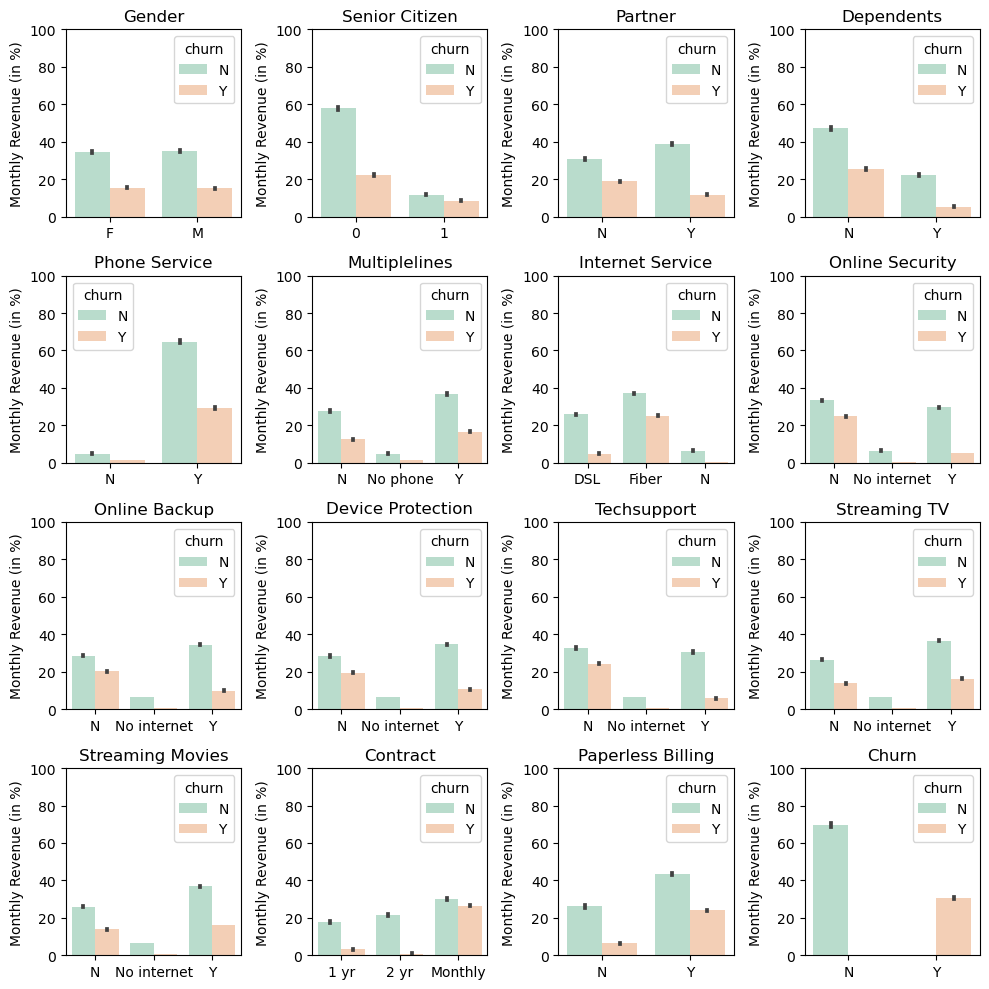

In [28]:
## Adding new column to the dataframe temporarily
# When the dataframe is grouped later, the estimator in `barplot`
# will give groupwise revenue share
df['share'] = (df['monthlycharges'] * 100) / df['monthlycharges'].sum()

fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))
titles = ['Gender', 'Senior Citizen', 'Partner', 'Dependents',
          'Phone Service', 'Multiplelines', 'Internet Service', 'Online Security',
          'Online Backup', 'Device Protection', 'Techsupport', 'Streaming TV',
          'Streaming Movies', 'Contract', 'Paperless Billing', 'Churn']

## axs.flat is an attribute and contains a flattened axs vector/ list
ax_title_pairs = zip(axs.flat, titles)

for ax, title in ax_title_pairs:
    sns.barplot(x=''.join(title.lower().split()), y='share', hue='churn', data=df,
                estimator=np.sum, palette='Pastel2', ax=ax)
    ax.set_title(title)
    ax.set_ylim(0, 100)
    ax.set_xlabel('')
    ax.set_ylabel('Monthly Revenue (in %)')

fig.tight_layout()

In [29]:
## Remove the 'share' column
df.drop(labels=['share'], axis=1, inplace=True)

<a id="churn-among-phone-service%2C-multiple-lines%2C-and-internet-service"></a>
## 3.7.  Churn among phone service, multiple lines, and internet service
Modifying seaborn countplot make it work with FacetGrid when all 3 arguments (`hue`, `row`, and `col`) are used.

In [30]:
def modified_countplot(**kargs):
    """
        Assumes that columns to be plotted are in of pandas dtype='CategoricalDtype'
    """
    facet_gen = kargs['facet_generator']    ## Facet generator over facet data
    curr_facet, facet_data = None, None
    
    while True:
        ## Keep yielding until non-empty dataframe is found
        curr_facet = next(facet_gen)            ## Yielding facet genenrator
        df_rows = curr_facet[1].shape[0]
        
        ## Skip the current facet if its corresponding dataframe empty
        if df_rows:
            facet_data = curr_facet[1]
            break
    
    x_hue = (kargs.get('x'), kargs.get('hue'))
    cols = [col for col in x_hue if col]
    col_categories = [facet_data[col].dtype.categories if col else None for col in x_hue]
    
    palette = kargs['palette'] if 'palette' in kargs.keys() else 'Pastel2'
    sns.countplot(x=cols[0], hue=x_hue[1], 
                  order=col_categories[0], hue_order=col_categories[1],
                  data=facet_data.loc[:, cols], palette=palette)

phoneservice      N                                            Y              \
multiplelines     N          No phone            Y             N               
internetservice DSL Fiber  N      DSL Fiber  N DSL Fiber  N  DSL Fiber     N   
churn                                                                          
N                 0     0  0      510     0  0   0     0  0  831   628  1077   
Y                 0     0  0      170     0  0   0     0  0  216   530   103   

phoneservice                                       
multiplelines   No phone             Y             
internetservice      DSL Fiber  N  DSL Fiber    N  
churn                                              
N                      0     0  0  616  1171  330  
Y                      0     0  0   73   767   10

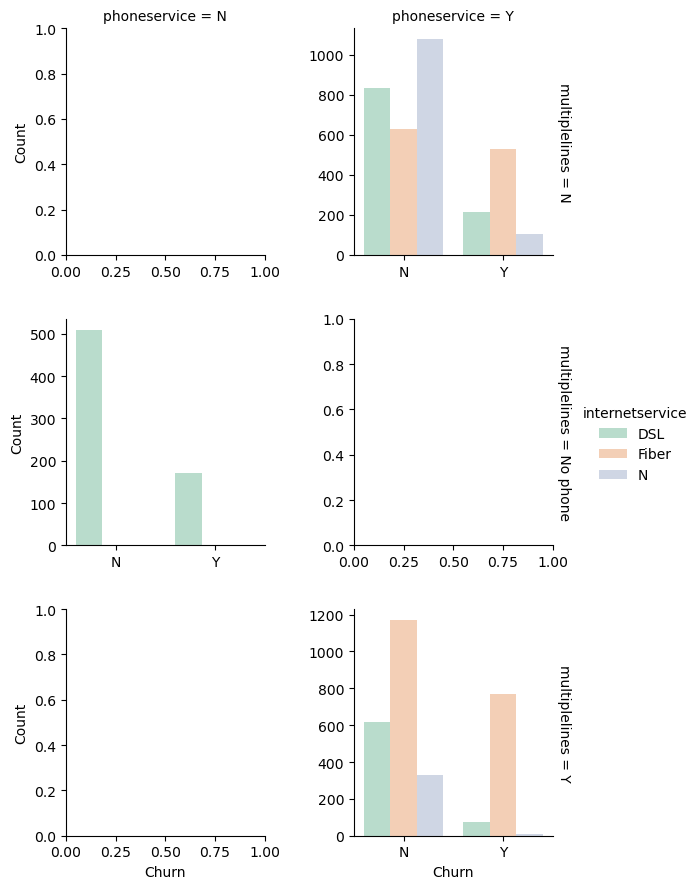

In [31]:
## phone service, multiple lines, internet service
display(pd.crosstab(df['churn'], [df['phoneservice'], df['multiplelines'], df['internetservice']], dropna=False))

## PLOT
facet = sns.FacetGrid(df, row='multiplelines', col='phoneservice',
                      sharex=False, sharey=False, margin_titles=True)
facet.map(modified_countplot, x='churn', hue='internetservice',
          palette='Pastel2', facet_generator=facet.facet_data())
facet.set_xlabels('Churn')
facet.set_ylabels('Count')
facet.add_legend(title='internetservice');

<a id="churn-among-phone-service%2C-internet-service%2C-and-seniorcitizen"></a>
## 3.8.  Churn among phone service, internet service, and seniorcitizen

phoneservice       N                           Y                           
seniorcitizen      0            1              0                1          
internetservice  DSL Fiber  N DSL Fiber  N   DSL Fiber     N  DSL Fiber   N
churn                                                                      
N                450     0  0  60     0  0  1326  1361  1360  121   438  47
Y                126     0  0  44     0  0   255   904   108   34   393   5

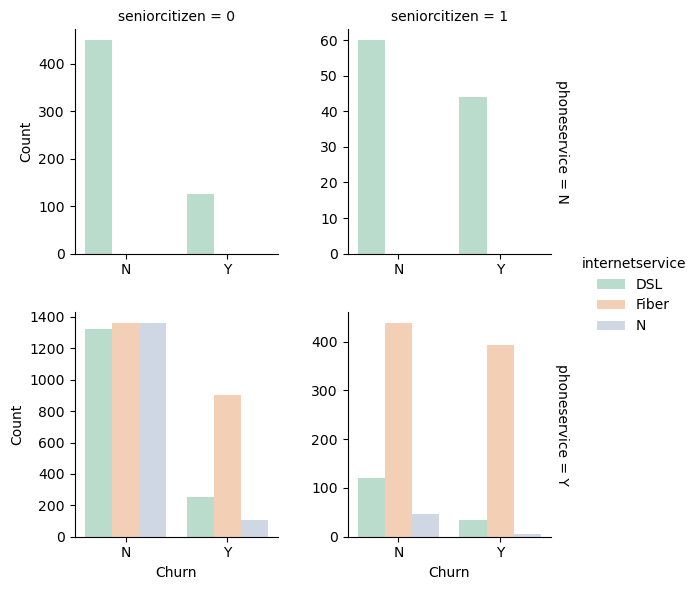

In [32]:
## phone service, internet service, seniorcitizen
crosstab_cols = [df['phoneservice'], df['seniorcitizen'], df['internetservice']]
display(pd.crosstab(df['churn'], crosstab_cols, dropna=False))

## PLOT
facet = sns.FacetGrid(df, row='phoneservice', col='seniorcitizen', 
                      sharex=False, sharey=False, margin_titles=True)
facet.map(modified_countplot, x='churn', hue='internetservice', 
          palette='Pastel2', facet_generator=facet.facet_data())
facet.set_xlabels('Churn')
facet.set_ylabels('Count')
facet.add_legend(title='internetservice');

<a id="churn-among-phone-service%2C-internet-service%2C-and-gender"></a>
## 3.9.  Churn among phone service, internet service, and gender

phoneservice       N                           Y                           
gender             F             M             F               M           
internetservice  DSL Fiber  N  DSL Fiber  N  DSL Fiber    N  DSL Fiber    N
churn                                                                      
N                249     0  0  261     0  0  716   889  690  731   910  717
Y                 80     0  0   90     0  0  139   664   56  150   633   57

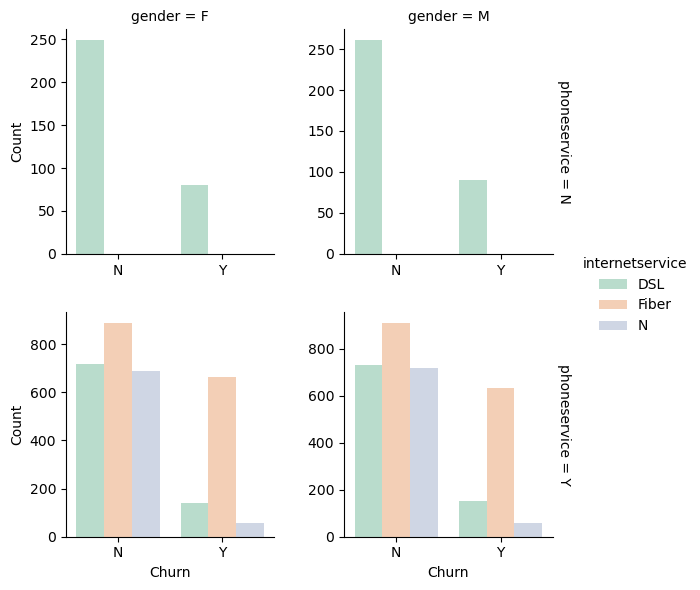

In [33]:
## phone service, internet service, gender
crosstab_cols = [df['phoneservice'], df['gender'], df['internetservice']]
display(pd.crosstab(df['churn'], crosstab_cols, dropna=False))

## PLOT
facet = sns.FacetGrid(df, row='phoneservice', col='gender', 
                      sharex=False, sharey=False, margin_titles=True)
facet.map(modified_countplot, x='churn', hue='internetservice',
          palette='Pastel2', facet_generator=facet.facet_data())
facet.set_xlabels('Churn')
facet.set_ylabels('Count')
facet.add_legend(title='internetservice');

<a id="churn-among-internet-service%2C-streamingtv%2C-and-streamingmovies"></a>
## 3.10.  Churn among internet service, streamingtv, and streamingmovies

internetservice     Y                     N         
streamingtv         N         Y           N     Y   
streamingmovies     N    Y    N     Y     N  Y  N  Y
churn                                               
N                1322  545  521  1368  1407  0  0  0
Y                 695  247  243   571   113  0  0  0

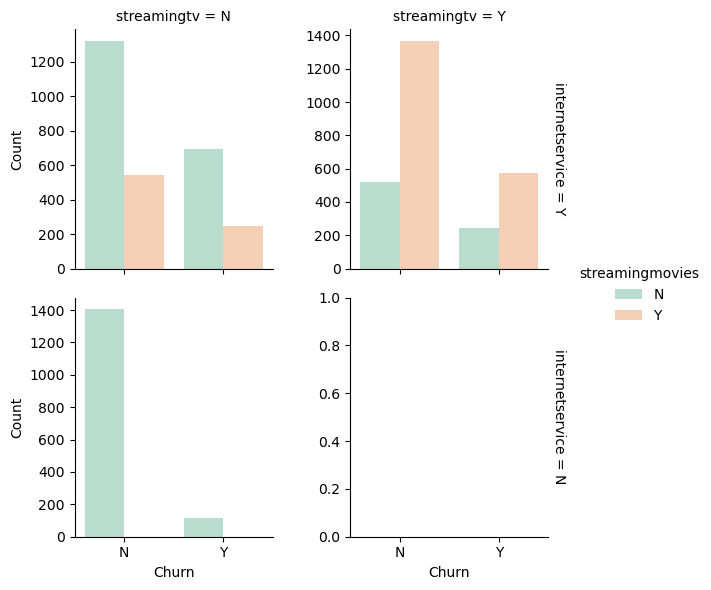

In [34]:
## internet service, streamingtv, streamingmovies
# Remap values
## Having 'DSL' or 'Fiber' internet implies having internet
value_mapper = {'internetservice':  {'Fiber': 'Y', 'DSL': 'Y', 
                                     'No internet': 'N'},
                'streamingtv': {'No internet': 'N'},
                'streamingmovies': {'No internet': 'N'}}
df_modified = df.replace(to_replace=value_mapper)
df_modified = to_categorical(list(value_mapper.keys()), df_modified)

display(pd.crosstab(df_modified['churn'], 
                    [df_modified['internetservice'], 
                     df_modified['streamingtv'], 
                     df_modified['streamingmovies']], 
                    dropna=False))

## PLOT
facet = sns.FacetGrid(df_modified, row='internetservice', col='streamingtv', 
                      sharey=False, margin_titles=True)
facet_data = facet.facet_data()
facet.map(modified_countplot, x='churn', hue='streamingmovies', 
          palette='Pastel2', facet_generator=facet_data)
facet.set_xlabels('Churn')
facet.set_ylabels('Count')
facet.add_legend(title='streamingmovies');

<a id="churn-among-contract-and-internet-service"></a>
## 3.11.  Churn among contract and internet service

contract        1 yr            2 yr            Monthly           
internetservice  DSL Fiber    N  DSL Fiber    N     DSL Fiber    N
churn                                                             
N                517   435  354  611   398  628     829   966  425
Y                 53   104    9   12    31    5     394  1162   99

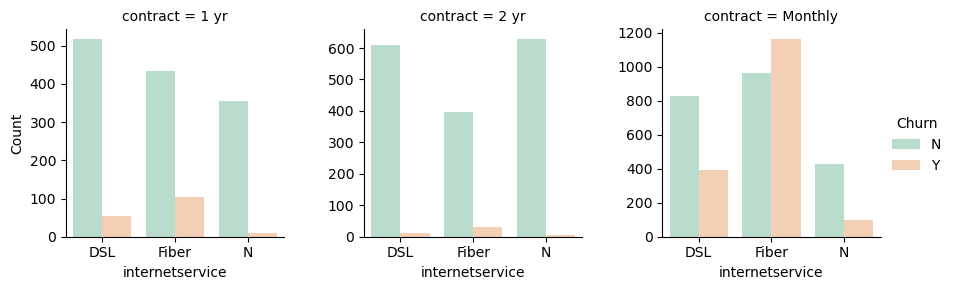

In [35]:
## phone service, multiple lines, internet service
display(pd.crosstab(df['churn'], [df['contract'], df['internetservice']], dropna=False))

## PLOT
facet = sns.FacetGrid(df, col='contract',sharex=False, sharey=False)
facet.map(modified_countplot, x='internetservice', hue='churn',
          palette='Pastel2', facet_generator=facet.facet_data())
facet.set_xlabels('internetservice')
facet.set_ylabels('Count')
facet.add_legend(title='Churn');

<a id="data-preprocessing"></a>
# 4.  Data Preprocessing
Data needs to be one-hot-encoded before applying machine learning models.

In [36]:
x = df.iloc[:, :-1]
y = df['churn']

categorical_columns = list(x.select_dtypes(include='category').columns)
numeric_columns = list(x.select_dtypes(exclude='category').columns)

<a id="train-test-split"></a>
## 4.1.  Train-Test split


In [37]:
from sklearn.model_selection import train_test_split

data_splits = train_test_split(x, y, test_size=0.25, random_state=0,
                               shuffle=True, stratify=y)
x_train, x_test, y_train, y_test = data_splits


# For CatBoost and Naive Bayes
data_splits = train_test_split(x, y, test_size=0.25, random_state=0,
                               shuffle=True, stratify=y)
x_train_cat, x_test_cat, y_train_cat, y_test_cat = data_splits


# Save the non-scaled version of monthlycharges and totalcharges to compare classifiers
x_test_charges = np.array(x_test[['monthlycharges', 'totalcharges']], copy=True)

list(map(lambda x: x.shape, [x, y, x_train, x_test, y_train, y_test]))

[(7032, 19), (7032,), (5274, 19), (1758, 19), (5274,), (1758,)]

In [38]:
pd.Series(y_test).value_counts()

N    1291
Y     467
Name: churn, dtype: int64

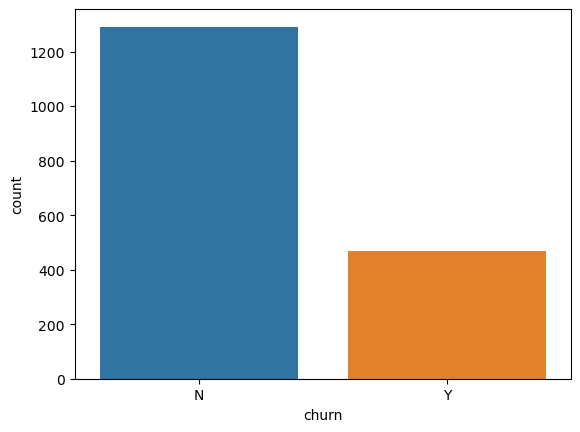

In [39]:
sns.countplot(x=y_test);

<a id="one-hot-encoding-and-standardization"></a>
## 4.2.  One-hot Encoding and Standardization


In [40]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder

categorical_columns = list(x.select_dtypes(include='category').columns)


## Column Transformer
transformers = [('one_hot_encoder',
                  OneHotEncoder(drop='first',dtype='int'),
                  categorical_columns),
                ('standard_scaler', StandardScaler(), numeric_columns)]
x_trans = ColumnTransformer(transformers, remainder='passthrough')

## Applying Column Transformer
x_train = x_trans.fit_transform(x_train)
x_test = x_trans.transform(x_test)

## Label encoding
y_trans = LabelEncoder()
y_train = y_trans.fit_transform(y_train)
y_test = y_trans.transform(y_test)


## Save feature names after one-hot encoding for feature importances plots
feature_names = list(x_trans.named_transformers_['one_hot_encoder'] \
                            .get_feature_names(input_features=categorical_columns))
feature_names = feature_names + numeric_columns

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
